# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb data provides details of 10,000 movies. The data include details like casts, revenue, budget, popularity etc. This data can be analysed to find interesting pattern between movies.

We can use this data to try to answer following questions:

- What is the yearly revenue change?
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- Who are top 15 highest grossing directors?
- Who are top 15 highest grossing actors?

In [653]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [654]:
# Load TMDb data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb_movies = pd.read_csv('tmdb-movies.csv')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [655]:
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

As evident from the data, it seems we have cast of the movie as string separated by `|` symbol. This needs to be converted into a suitable type in order to consume it properly later.

In [656]:
# Pandas read empty string value as nan, make it empty string
tmdb_movies.cast.fillna('', inplace=True)
tmdb_movies.genres.fillna('', inplace=True)
tmdb_movies.director.fillna('', inplace=True)
tmdb_movies.production_companies.fillna('', inplace=True)

In [657]:
def string_to_array(data):
    """
        This function returns given splitss the data by separator `|` and returns the result as array
    """
    return data.split('|')

#### Convert cast, genres, director and production_companies columns to array

In [658]:
tmdb_movies.cast = tmdb_movies.cast.apply(string_to_array)

In [659]:
tmdb_movies.genres = tmdb_movies.genres.apply(string_to_array)

In [660]:
tmdb_movies.director = tmdb_movies.director.apply(string_to_array)

In [661]:
tmdb_movies.production_companies = tmdb_movies.production_companies.apply(string_to_array)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the yearly revenue change?

It's evident from observations below that there is no clear trend in change in mean revenue over years. 

- Mean revenue from year to year is quite unstable. This can be attributed to number of movies and number of movies having high or low revenue
- The gap between __budget__ and __revenue__ have widened after 2000. This can be attributed to circulation of movies worldwide compared to earlier days.

In [662]:
def yearly_growth(mean_revenue):
    return mean_revenue - mean_revenue.shift(1).fillna(0)

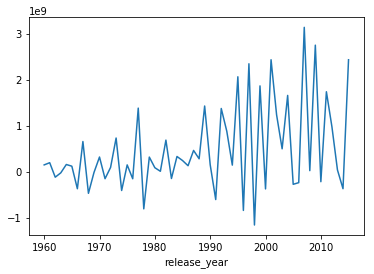

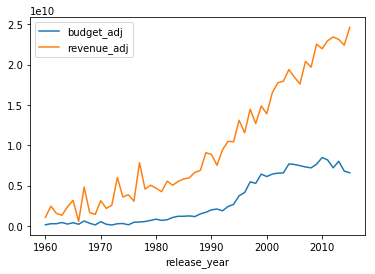

In [663]:
# Show change in mean revenue over years, considering only movies for which we have revenue data
movies_with_revenue = tmdb_movies[tmdb_movies.revenue > 0]

revenues_over_years = movies_with_revenue.groupby('release_year').sum()
revenues_over_years.apply(yearly_growth)['revenue'].plot()
revenues_over_years[['budget_adj', 'revenue_adj']].plot()


### Research Question 2: Which genres are most popular from year to year?

Since popularity column indicates all time popularity of the movie, it might not be the right metric to measure popularity over years. We can measure popularty of a movie based on average vote. I think a movie is popular if `vote_average >= 7`.

On analyzing the popular movies since 1960(check illustrations below), following onservations can be made:

- Almost all popular movies have `Drama` genre
- Over years `Comedy`, `Action` and `Adventure` got popular.
- In recent years, `Documentry`, `Action` and `Animation` movies got more popularity.

In [664]:
def popular_movies(movies):
    return movies[movies['vote_average']>=7]

In [665]:
def group_by_genre(data):
    """
        This function takes a Data Frame having and returns a dictionary having
        release_year as key and value a dictionary having key as movie's genre
        and value as frequency of the genre that year.
    """
    genres_by_year = {}
    for (year, position), genres in data.items():
        for genre in genres:
            if year in genres_by_year:
                if genre in genres_by_year[year]:
                    genres_by_year[year][genre] += 1
                else:
                    genres_by_year[year][genre] = 1
            else:
                genres_by_year[year] = {}
                genres_by_year[year][genre] = 1
    return genres_by_year
            

In [666]:
def plot(genres_by_year):
    """
        This function iterates over each row of Data Frame and prints rows
        having release_year divisible by 5 to avoid plotting too many graphs.
    """
    for year, genres in genres_by_year.items():
        if year%5 == 0:
            pd.DataFrame(grouped_genres[year], index=[year]).plot(kind='bar', figsize=(20, 6))

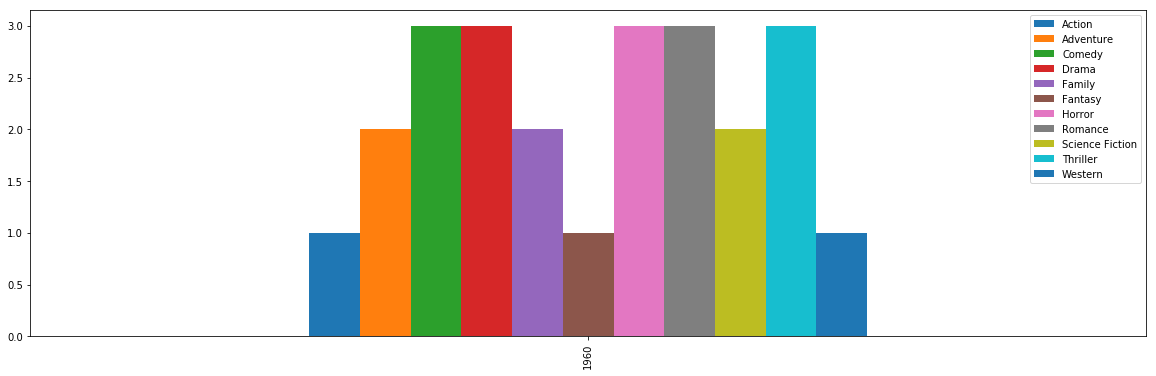

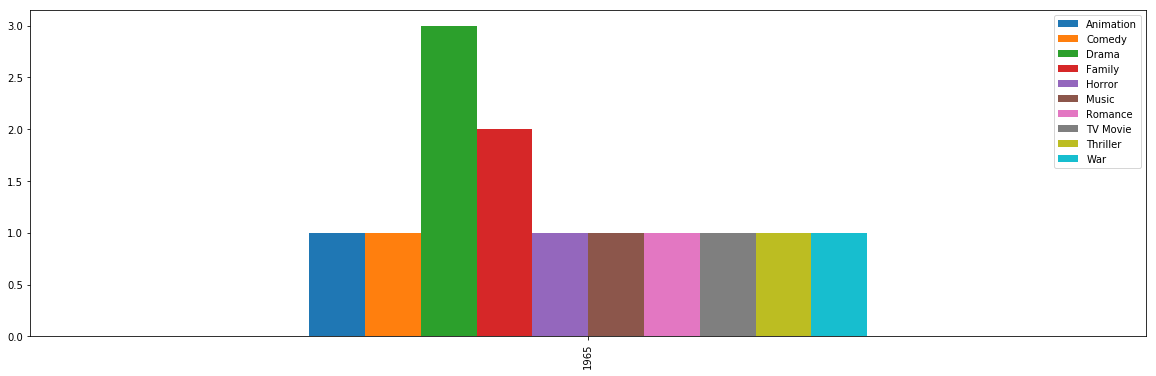

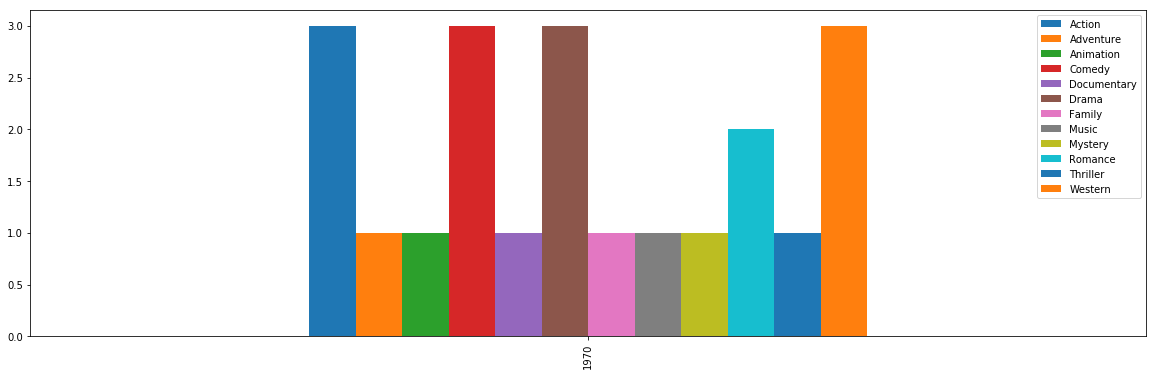

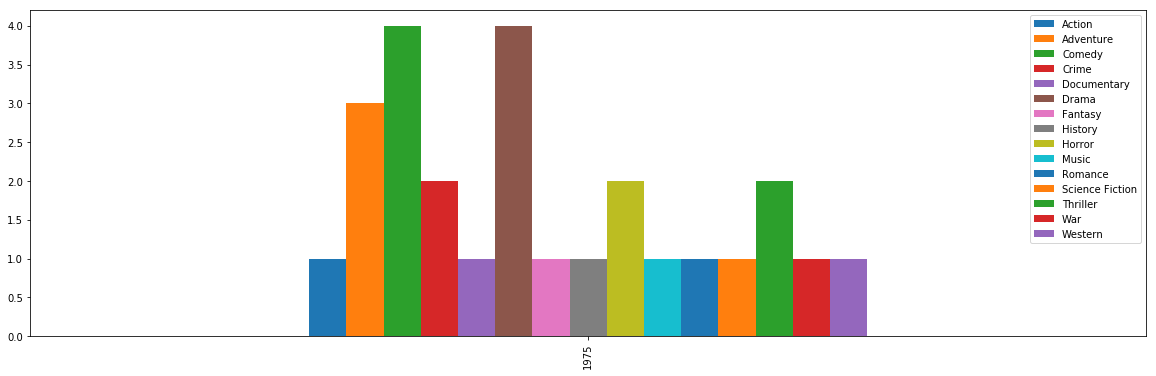

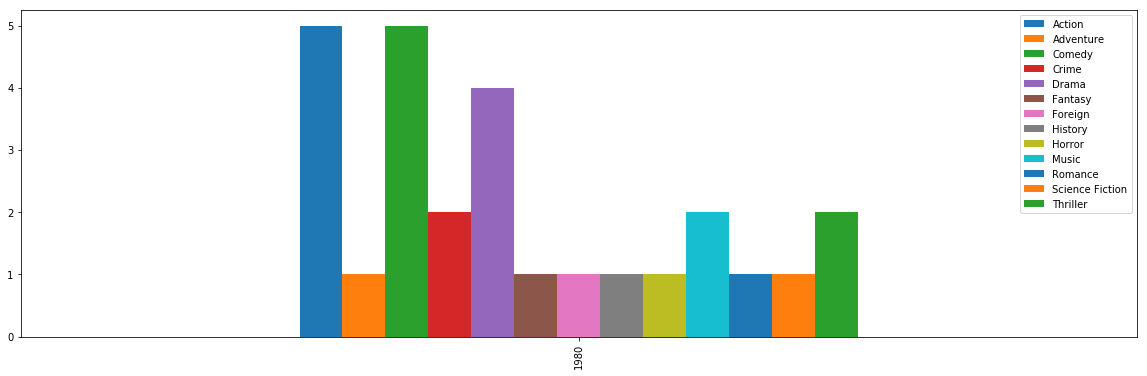

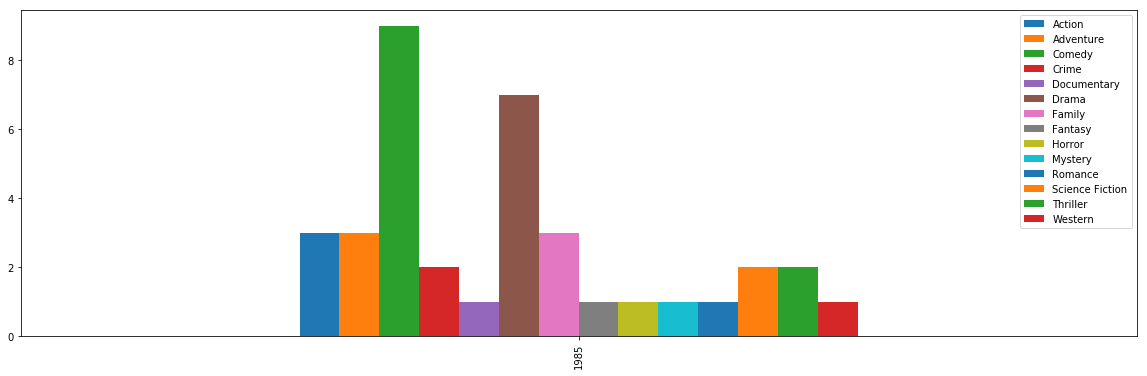

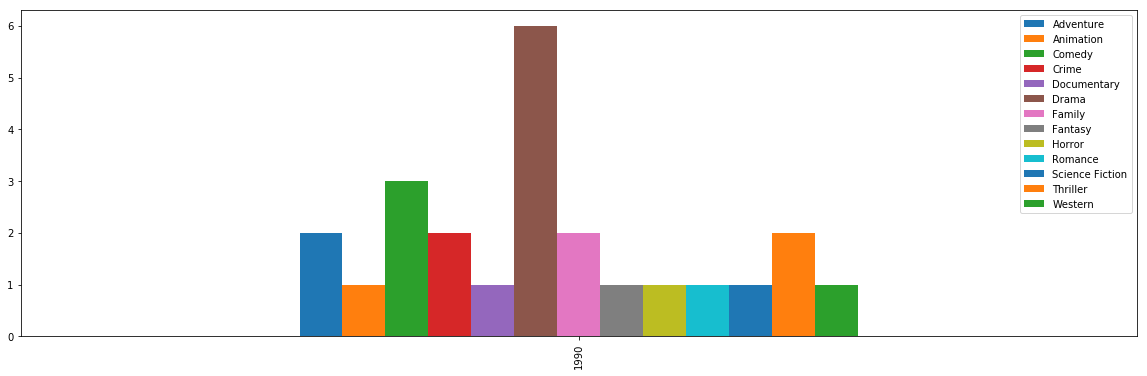

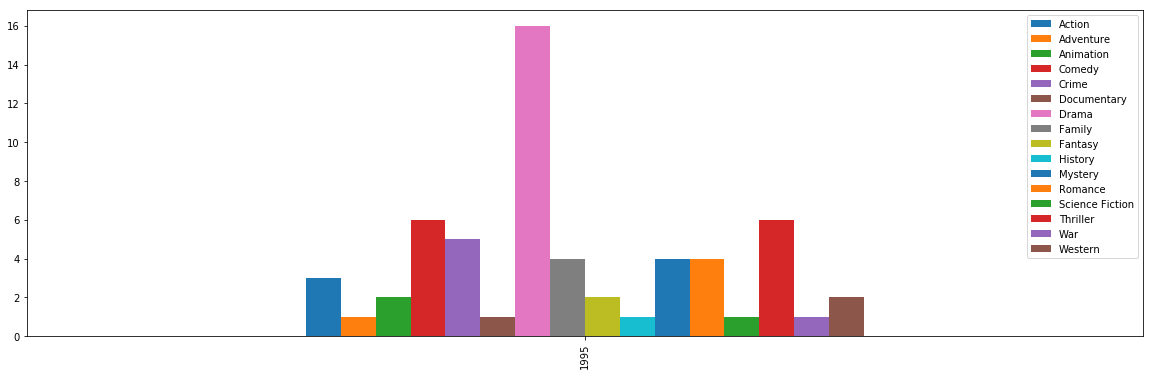

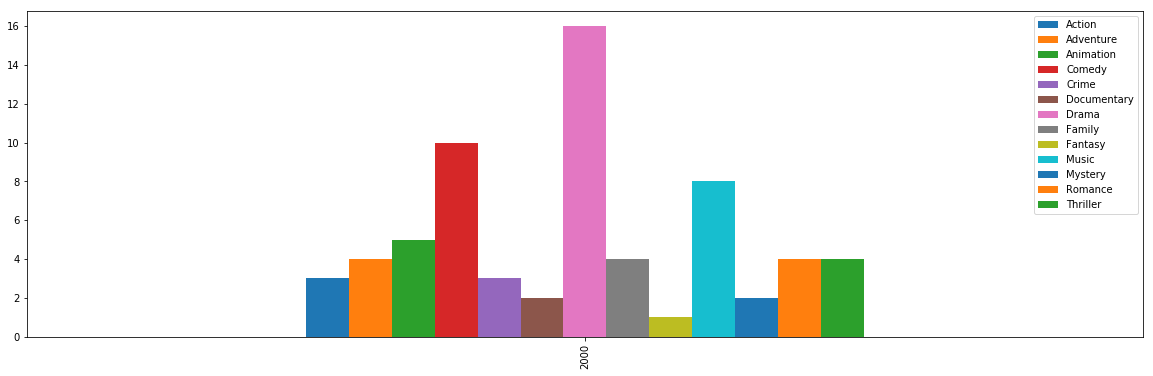

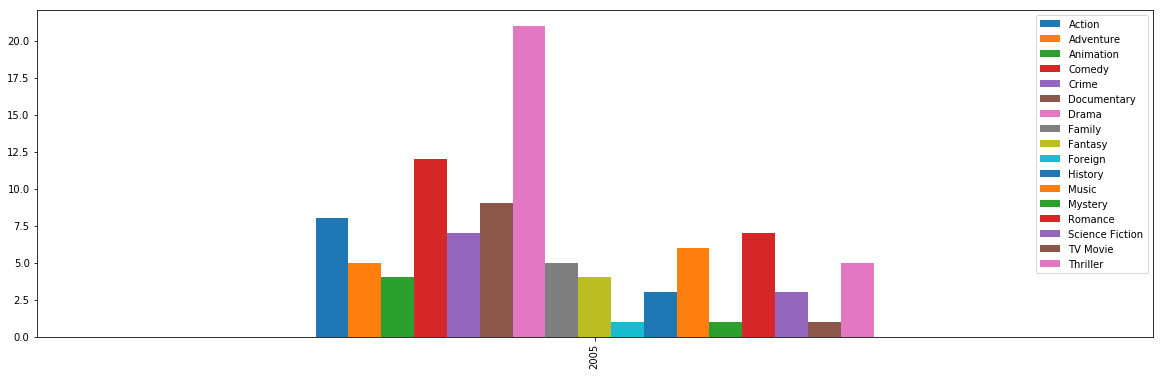

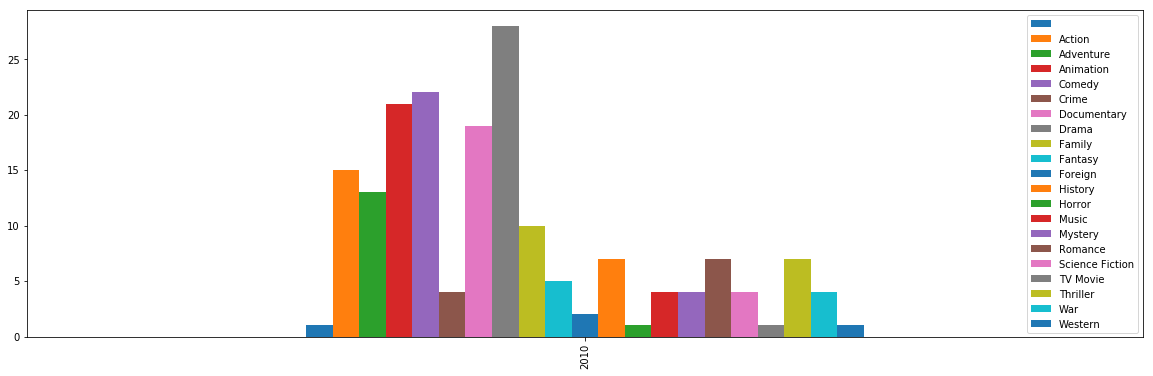

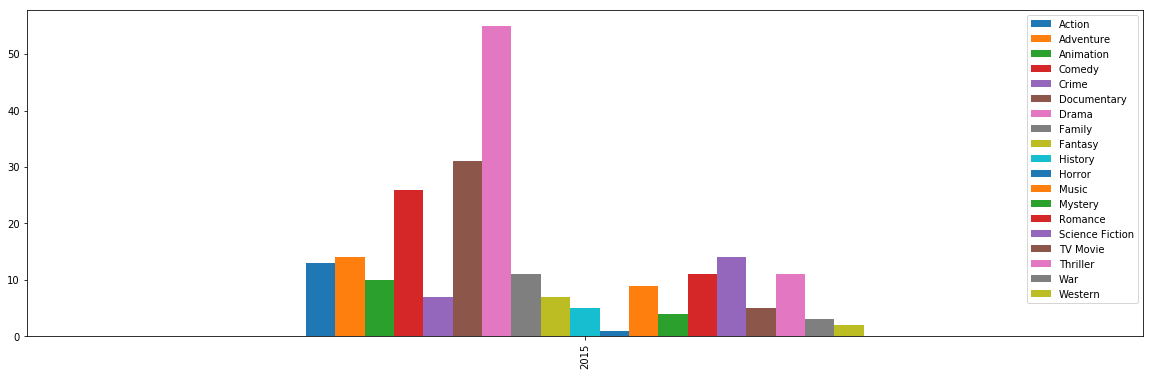

In [667]:
# Group movies by genre for each year and try to find the correlations
# of genres over years.
grouped_genres = group_by_genre(tmdb_movies.groupby('release_year').apply(popular_movies).genres)
plot(grouped_genres)

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

We can consider those movies with at least 1 billion revenue and see what are common properties among them.

Considering this criteria and based on illustrations below, we can make following observations about highest grossing movies:

- `Adventure` and `Action` are most common genres among these movies followed by `Science Fiction`, `Fantasy` and `Family`.
- Most of the movies have more than 7 average vote, some movies have less than 7 but that is because of less number of total votes. This means highest grossing movies are popular as well.
- `Steven Spielberg` and `Peter Jackson` are directors who have highest muber of movies having at least 1 billion revenue.
- Most of the directors have only one movies having at least a billion revenue, hence there seems to be no corelation between highest grossing movies and directors.
- Most of the cast have one movie having at least a billion revenue.
- `Warner Bros.`, `Walt Disney`, `Fox Film` and `Universal picture` seems to have figured out the secret of highest grossing movies. They have highest number of at least a billion revenue movies. This does not mean all their movies have pretty high revenue.

In [668]:
highest_grossing_movies = tmdb_movies[tmdb_movies['revenue_adj'] >= 1000000000]\
                            .sort_values(by='revenue_adj', ascending=False)
highest_grossing_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",http://www.avatarmovie.com/,[James Cameron],Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",http://www.starwars.com/films/star-wars-episod...,[George Lucas],"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]","[Lucasfilm, Twentieth Century Fox Film Corpora...",3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",http://www.titanicmovie.com/menu.html,[James Cameron],Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",http://theexorcist.warnerbros.com/,[William Friedkin],Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]","[Warner Bros., Hoya Productions]",12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",http://www.jaws25.com/,[Steven Spielberg],Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]","[Universal Pictures, Zanuck/Brown Productions]",6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09


#### Find common genres in highest grossing movies

In [669]:
def count_frequency(data):
    frequency_count = {}
    for items in data:
        for item in items:
            if item in frequency_count:
                frequency_count[item] += 1
            else:
                frequency_count[item] = 1
    return frequency_count

{'Action': 23, 'Adventure': 32, 'Fantasy': 15, 'Science Fiction': 16, 'Drama': 9, 'Romance': 2, 'Thriller': 9, 'Horror': 2, 'Family': 15, 'Crime': 5, 'Mystery': 1, 'Animation': 8, 'Comedy': 4, 'Music': 1}


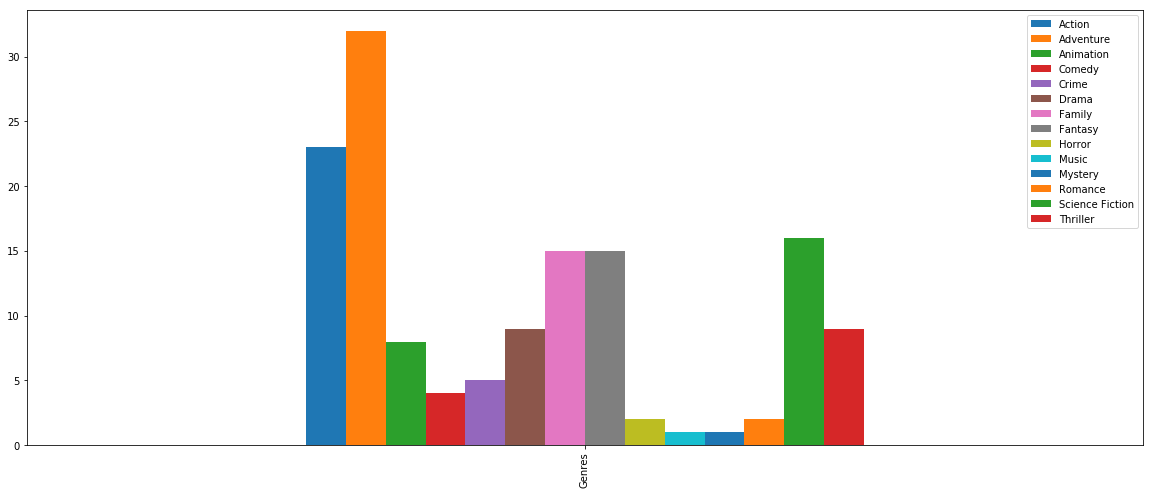

In [670]:
highest_grossing_genres = count_frequency(highest_grossing_movies.genres)
print(highest_grossing_genres)
pd.DataFrame(highest_grossing_genres, index=['Genres']).plot(kind='bar', figsize=(20, 8))

#### Popularity of highest grossing movies

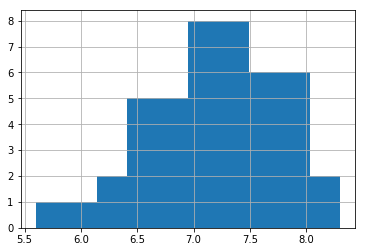

In [671]:
highest_grossing_movies.vote_average.hist()

#### Directors of highest grossing movies

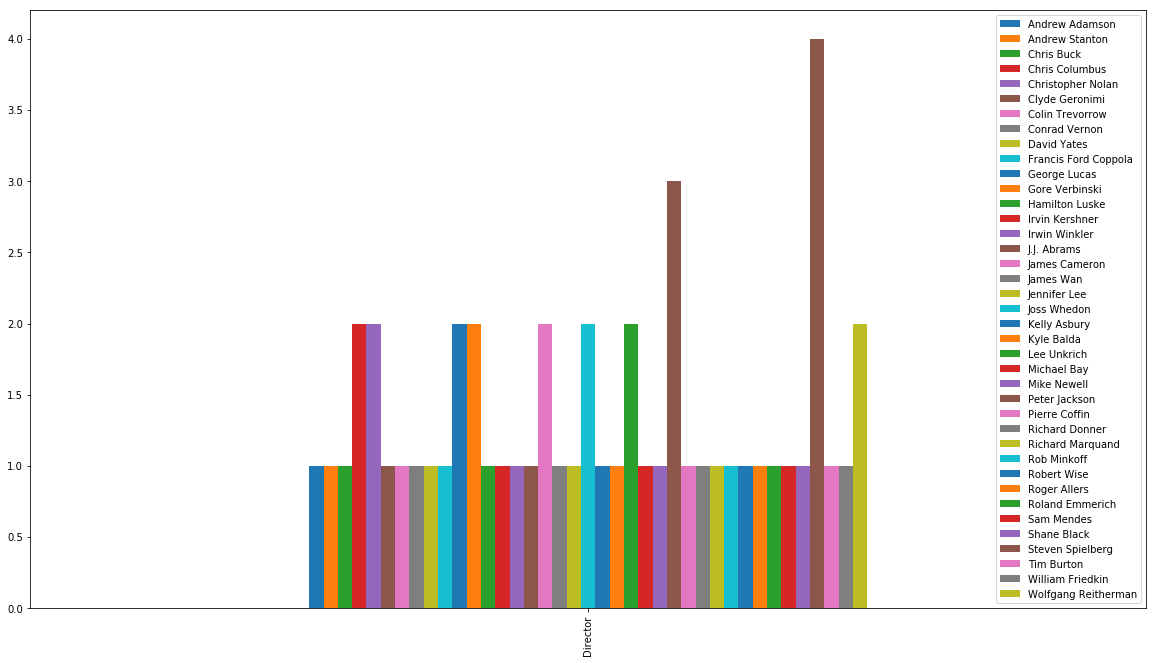

In [672]:
high_grossing_dirs = count_frequency(highest_grossing_movies.director)
pd.DataFrame(high_grossing_dirs, index=['Director']).plot(kind='bar', figsize=(20, 11))

#### Cast of highest grossing movies

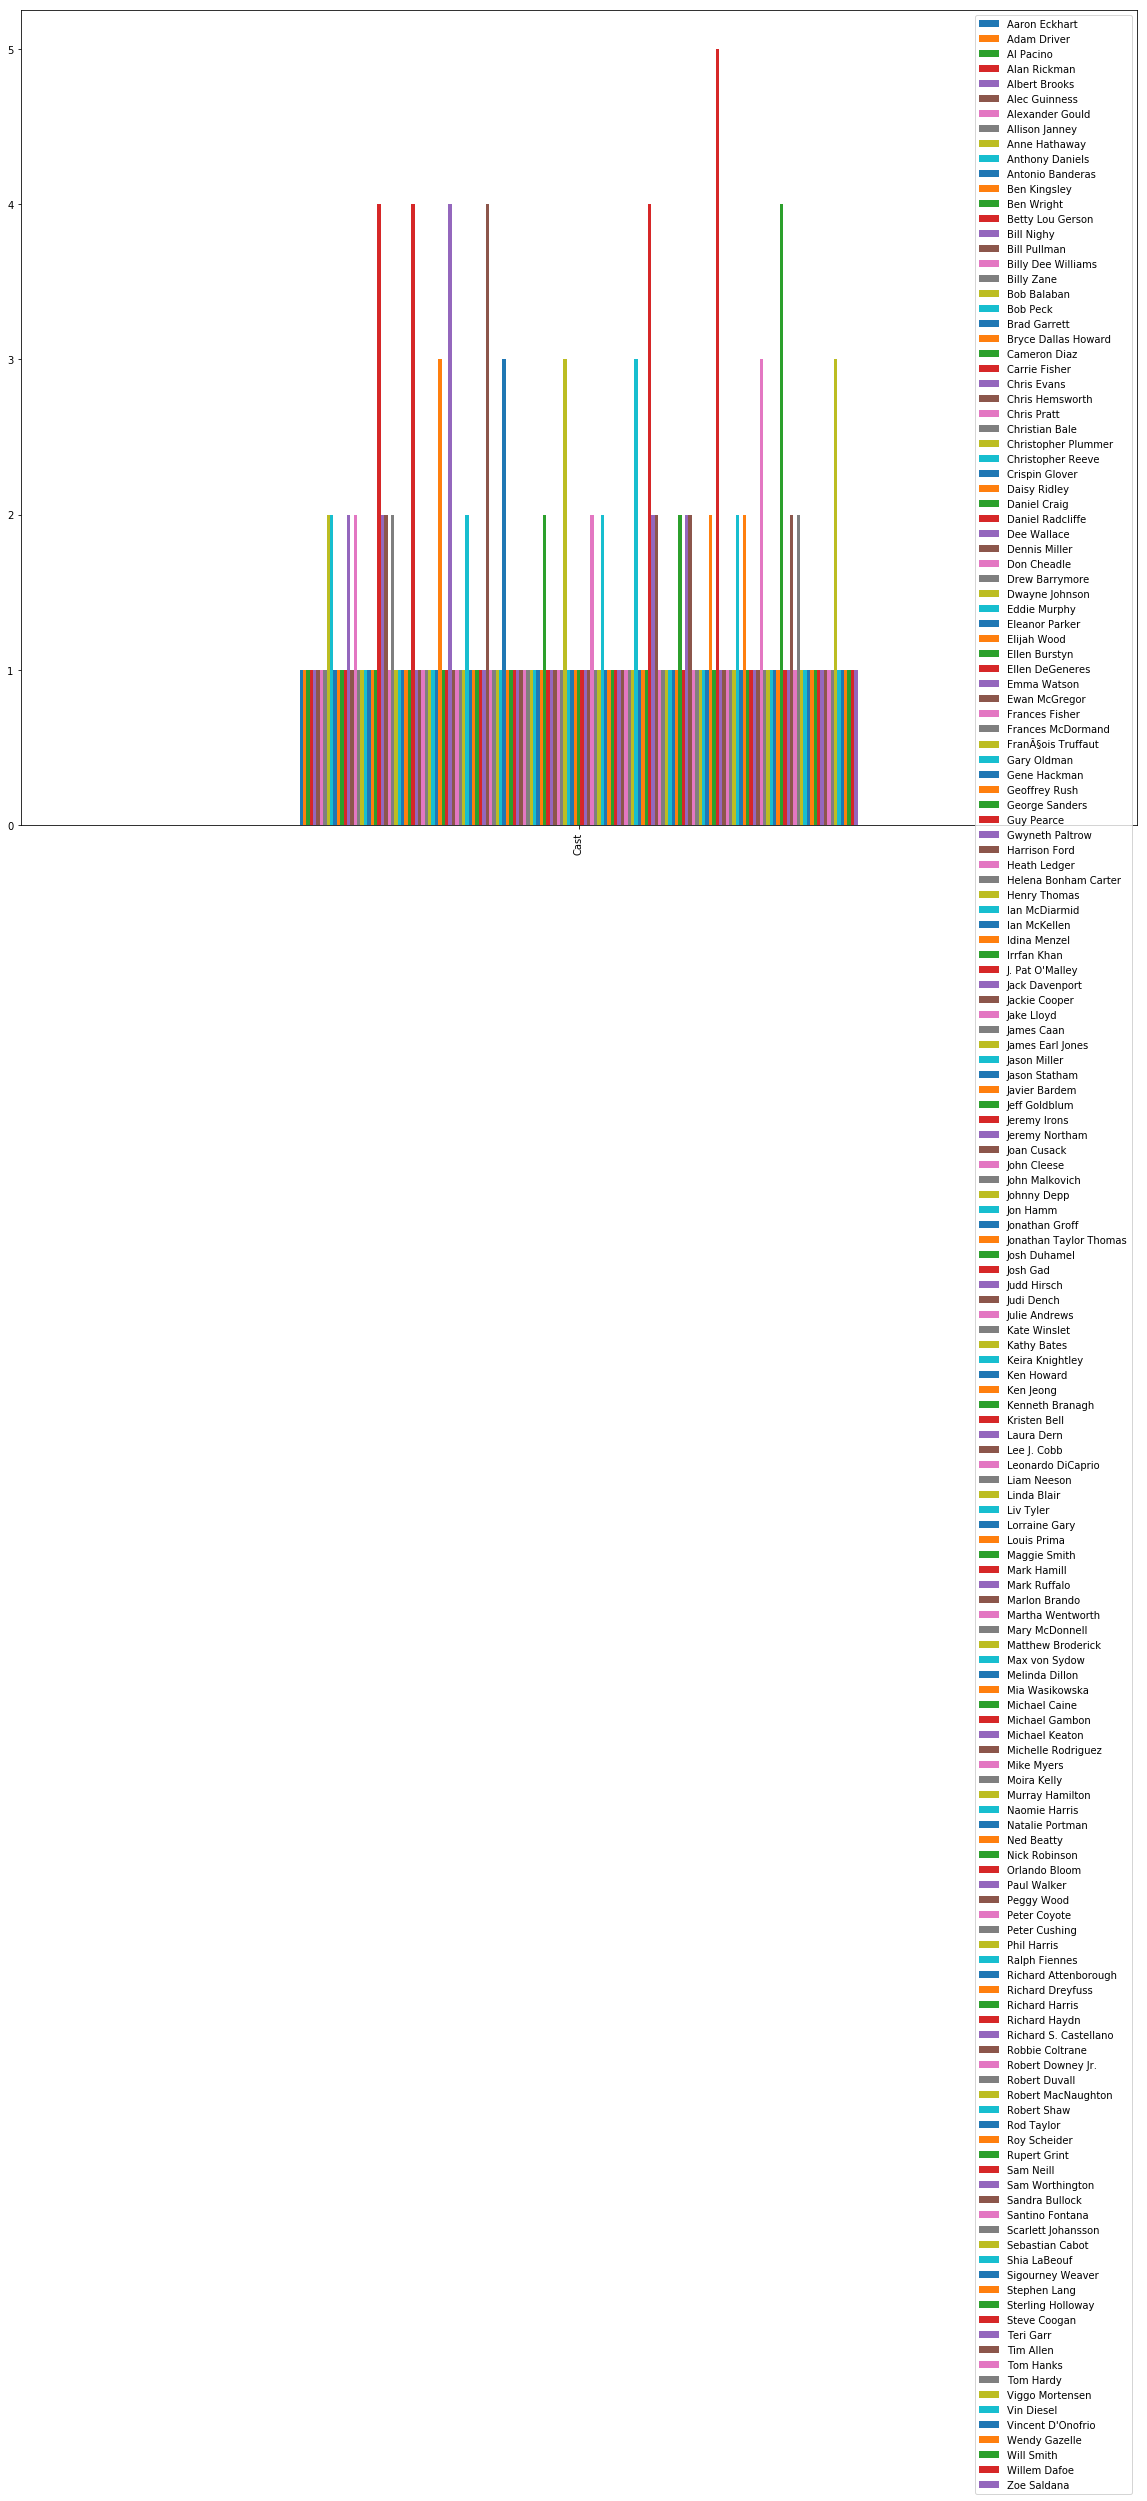

In [673]:
high_grossing_cast = count_frequency(highest_grossing_movies.cast)
pd.DataFrame(high_grossing_cast, index=['Cast']).plot(kind='bar', figsize=(20, 15))

#### Production companies of highest grossing movies

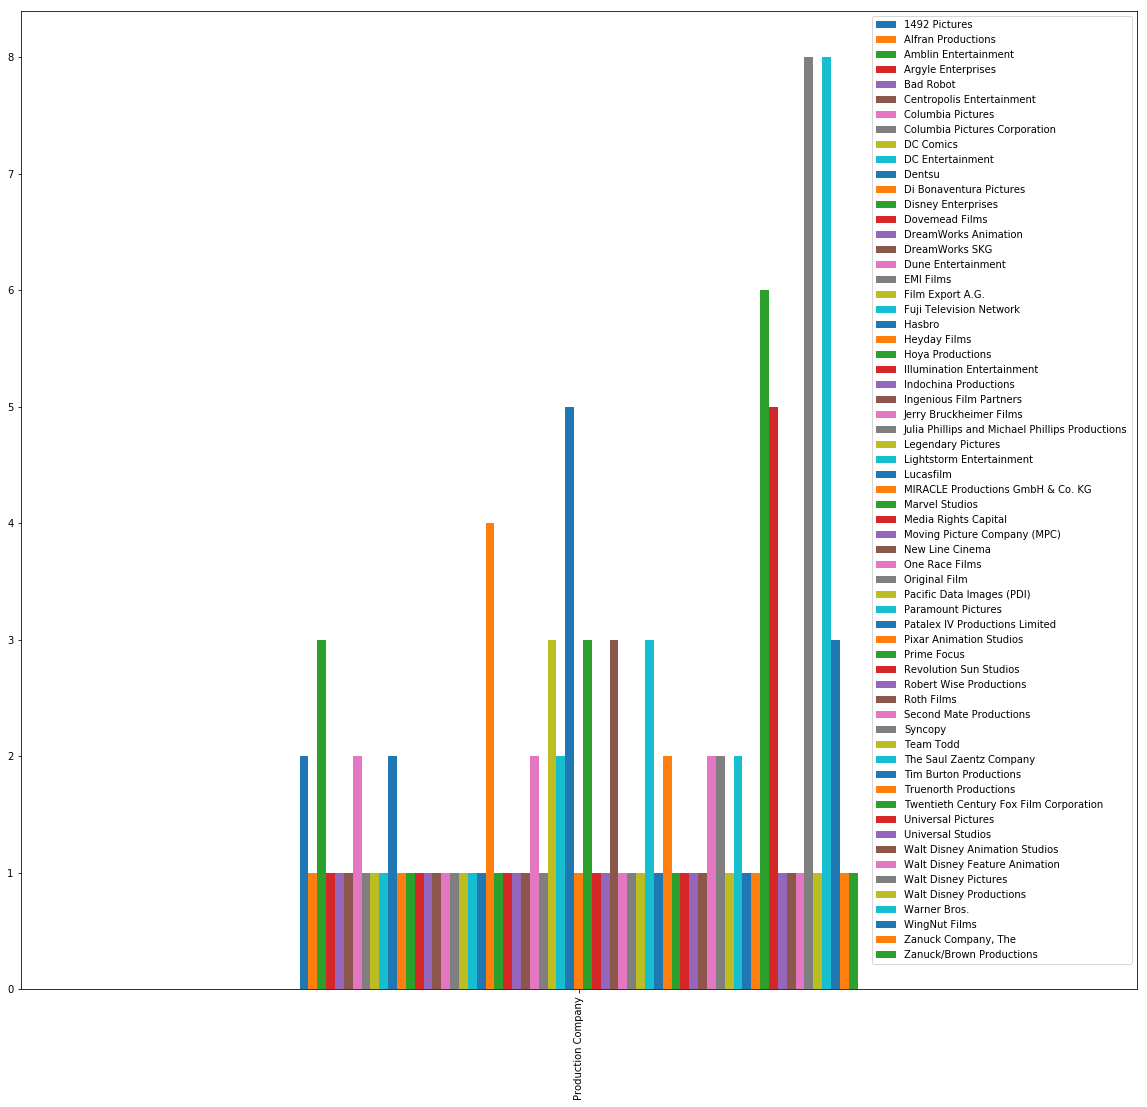

In [674]:
high_grossing_prod_comps = count_frequency(highest_grossing_movies.production_companies)
pd.DataFrame(high_grossing_prod_comps, index=['Production Company']).plot(kind='bar', figsize=(20, 18))

### Research Question 4: Who are top 30 highest grossing directors?

We can see the top 30 highest grossing directors in bar chart below.

It seems __Steven Spielberg__ surpasses other directors in gross revenue.

In [675]:
def grossing(movies, by):
    """
        This function returns the movies' revenues over key passed as `by` value in argument. 
    """
    revenues = {}
    for id, movie in movies.iterrows():
        for key in movie[by]:
            if key in revenues:
                revenues[key].append(movie.revenue_adj)
            else:
                revenues[key] = [movie.revenue_adj]
    return revenues

In [676]:
def gross_revenue(data):
    """
        This functions computes the sum of values of the dictionary and
        return a new dictionary with same key but cummulative value.
    """
    gross = {}
    for key, revenues in data.items():
        gross[key] = np.sum(revenues)
    return gross

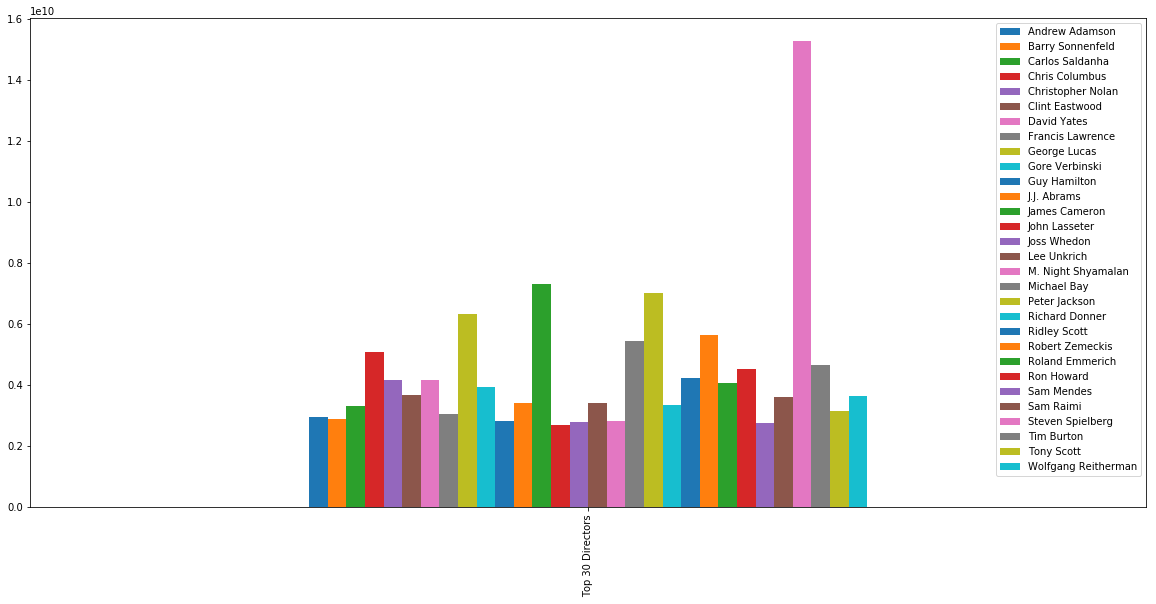

In [677]:
import operator

gross_by_dirs = grossing(movies=movies_with_revenue, by='director')

director_gross_revenue = gross_revenue(gross_by_dirs)

top_15_directors = dict(sorted(director_gross_revenue.items(), key=operator.itemgetter(1), reverse=True)[:30])
pd.DataFrame(top_15_directors, index=['Top 30 Directors']).plot(kind='bar', figsize=(20, 9))

### Research Question 5: Who are top 30 highest grossing actors?

We can find the top 30 actors based on  gross revenue as shown in subsequent sections below. 

As we can see __Harison Ford__ tops the chart with highest grossing.

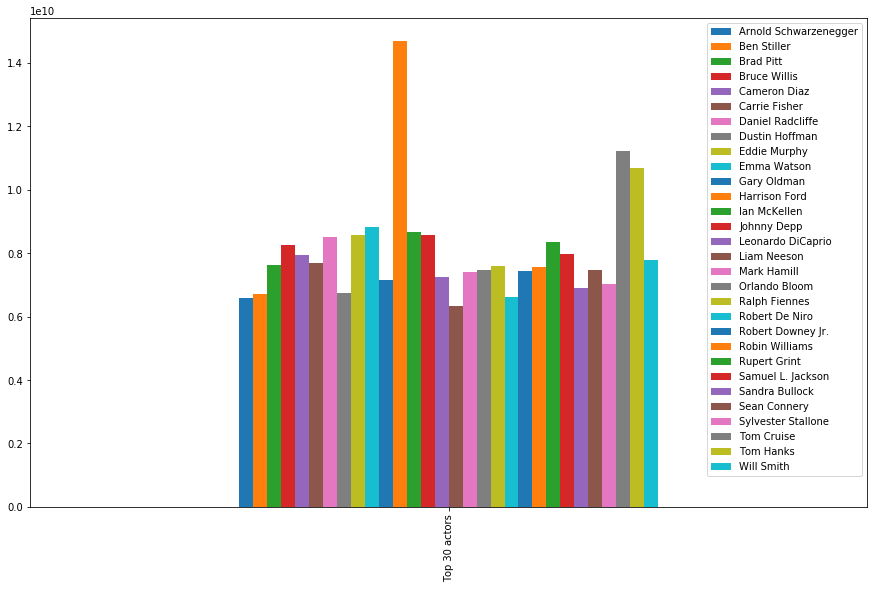

In [678]:

gross_by_actors = grossing(movies=tmdb_movies, by='cast')
actors_gross_revenue = gross_revenue(gross_by_actors)

top_15_actors = dict(sorted(actors_gross_revenue.items(), key=operator.itemgetter(1), reverse=True)[:30])
pd.DataFrame(top_15_actors, index=['Top 30 actors']).plot(kind='bar', figsize=(15, 9))

<a id='conclusions'></a>
## Conclusions

We tried to answer quite a few questions using TMDb data whch are summarised below:

- The gap between gross budget and revenue have increased over years.
- `Drama` genre is common traits among popular movies with `Comedy`, `Action`, `Adventure` and  `Animation` getting popular in recent years.
- There seems to be correlation between highest grossing movies and `Adventure` & `Action` genres. Also Highest grossing movies are correlated with high popularity.

#### References

- [Stack Overflow](https://stackoverflow.com/)
- [Pandas](https://pandas.pydata.org/)